In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


data = loadmat('ex8data1.mat')
X = data['X']
X.shape


(307, 2)

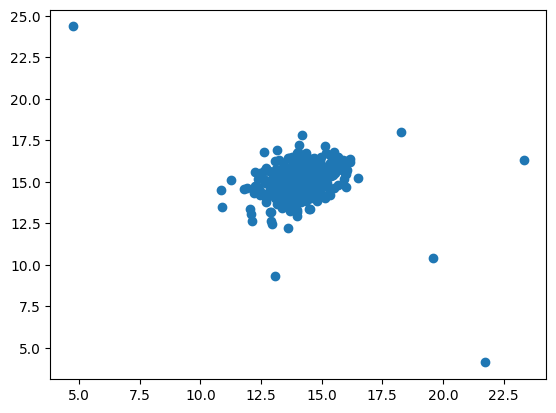

In [4]:
plt.scatter(X[:, 0], X[:, 1])

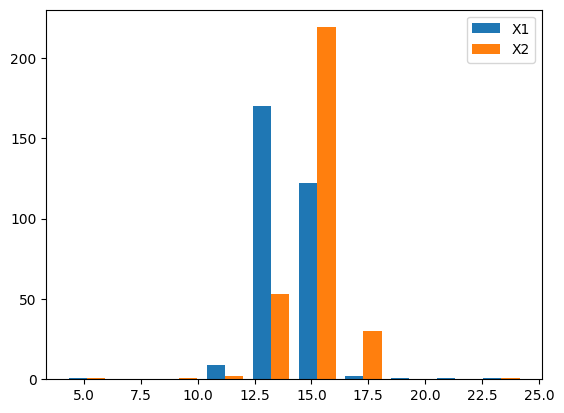

In [20]:
plt.hist(X)
plt.legend(['X1', 'X2'])

In [9]:
def estimate_gaussian(X):
    return [np.mean(X[:, 0]), np.mean(X[:, 1])], [np.std(X[:, 0]), np.std(X[:, 1])]


In [12]:
mu, sigma = estimate_gaussian(X)
mu, sigma


([14.112225783945592, 14.99771050813621],
 [1.353747174879607, 1.3075723042450764])

In [11]:
Xval = data["Xval"]
yval = data["yval"]

Xval.shape


In [ ]:
yval.shape


In [13]:
from scipy import stats

p = np.zeros((X.shape[0], X.shape[1]))
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], np.sqrt(sigma[0]))
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], np.sqrt(sigma[1]))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], mu[0], np.sqrt(sigma[0]))
pval[:, 1] = stats.norm.pdf(Xval[:, 1], mu[1], np.sqrt(sigma[1]))


In [14]:
from sklearn.metrics import f1_score


def select_threshold(pval, yval):
    thresholds = np.linspace(pval.min(), pval.max(), 1000)
    best_f1 = 0

    for th in thresholds:
        ypred = (pval[:, 0] < th) | (pval[:, 1] < th)
        new = f1_score(yval, ypred.astype(int))
        if new > best_f1:
            best_f1 = new
            best_epsilon = th
    return best_epsilon, best_f1


best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1


(0.00034923001962944495, 0.8750000000000001)

In [16]:
idx = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = [X[i] for i in idx][0]


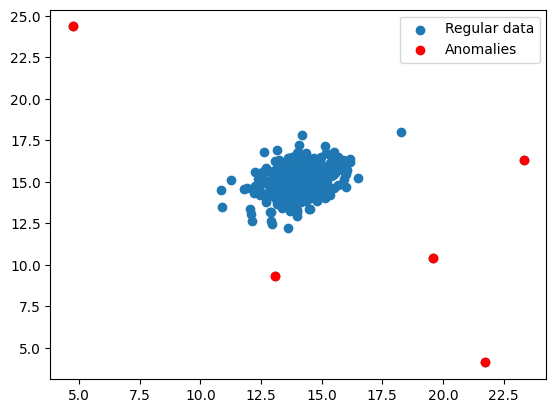

In [19]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], color="red")
plt.legend(["Regular data", "Anomalies"])
